# Exercício 3 da folha 6
## 3º ano de Licenciatura em Engenharia Física
### Universidade do Minho
Catarina Oliveira (a92831) e Diogo Gomes (a92848)

## Enunciado do exercício:

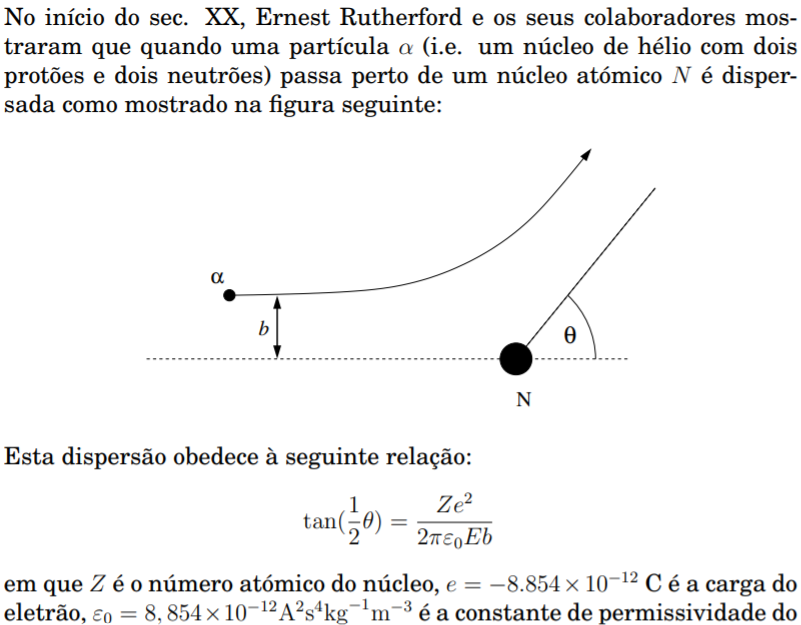

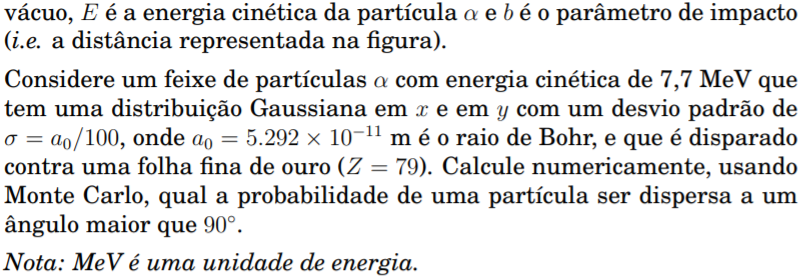

Dado um certo parâmetro de impacto, é possível calcular o ângulo de dispersão:

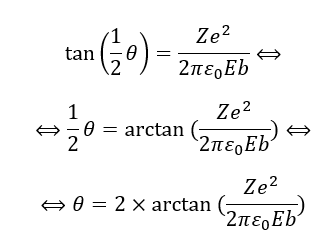

##Método de Monte Carlo
O método de Monte Carlo é um método computacional que utiliza números aleatórios e estatísticas para resolver problemas.
O interesse nesse estudo é aplicar
a técnica para calcular integrais e para simular eventos discretos. Para os casos em que as integrais não podem ser calculadas explicitamente, para o cálculo de integrais multidimensionais e para calcular integrais impróprias pode-se utilizar simulação de Monte Carlo. A simulação de um modelo probabilístico consiste na geração de mecanismos estocásticos e, em seguida, na observação do fluxo resultante do modelo ao longo do tempo.
Dependendo das razões para a simulação, haverá certas quantidades de interesse que se quer determinar.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Constantes do problema dadas no enunciado

#Carga do eletrão [C]
e=1.602E-19 

#Constante de permissividade [A²(s^4)kg-¹m-³]
ep0=8.854E-12

#Energia cinética [eV]
E1=7.7E6
#Energia cinética [J]
E=1.233E-12

#Raio de Bohr [m]
a0=5.292E-11

#Desvio padrão [m]
sigma=a0/100.0

#Número atómico do núcleo
Z=79.0

N=10000

In [ ]:
#Definição dos vetores do problema
centro_distx,centro_disty = (0,0)
desvio_x,desvio_y = (0.01*a0,0.01*a0)
bx = np.random.normal(centro_distx,desvio_x,N)
by = np.random.normal(centro_disty,desvio_y,N)
b = np.sqrt(bx**2 + by**2)
angle = 2*(np.arctan((Z*e**2)/(2*np.pi*ep0*E*b)))

#Método de Monte Carlo:
Nsup90 = 0
for elem in angle:
    if elem > np.pi/2:
        Nsup90 += 1
Prob = Nsup90/N

#Apresentação dos Resultados
print('Número de partículas lançadas:',N)
print('Número de partículas dispersas a um ângulo superior a 90 graus: ', Nsup90)
print('Probabilidade de uma partícula ser dispersa a um ângulo superior a 90 graus:',round(Prob*100,3),'%')

Número de partículas lançadas: 10000
Número de partículas dispersas a um ângulo superior a 90 graus:  12
Probabilidade de uma partícula ser dispersa a um ângulo superior a 90 graus: 0.12 %


##Estudo dos resultados obtidos
###Distribuições bx e by

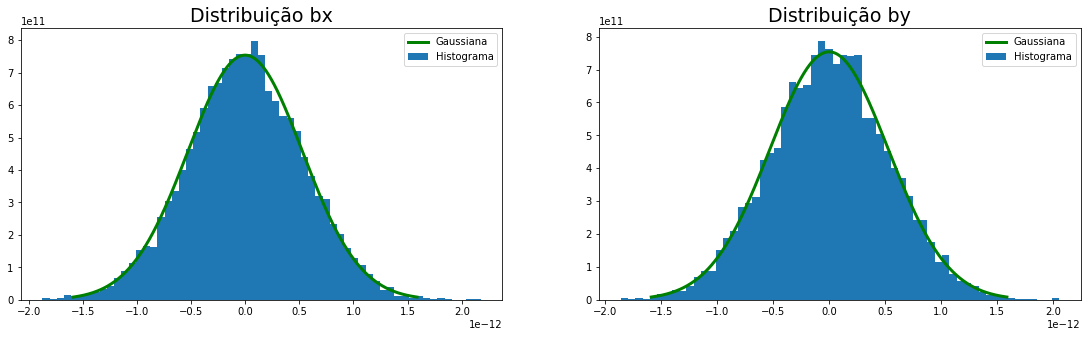

In [ ]:
#Função Gaussiana Normalizada
x1 = np.linspace(-3*desvio_x+centro_distx,3*desvio_x+centro_distx,N)
x2 = np.linspace(-3*desvio_y+centro_disty,3*desvio_y+centro_disty,N)
gauss = lambda x,centro,desvio: 1/(((2*np.pi)**(0.5))*desvio)*np.exp(-0.5*(((x-centro)/desvio)**2))

#Gráfico dos dados bx, by e as respetivas Gaussianas
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(19,5))
ax1.set_title('Distribuição bx',fontsize=19)
ax1.hist(bx, bins='auto',density='True',label='Histograma')
ax1.plot(x1,gauss(x1,centro_distx,desvio_x),'green',label='Gaussiana',linewidth=3)
ax1.legend()
ax2.set_title('Distribuição by',fontsize=19)
ax2.hist(by, bins='auto',density='True', label='Histograma')
ax2.plot(x2,gauss(x2,centro_disty,desvio_y),'green',label='Gaussiana',linewidth=3)
ax2.legend()
plt.show()

##Estudo dos resultados obtidos
###Distribuições gaussiana e ângulo

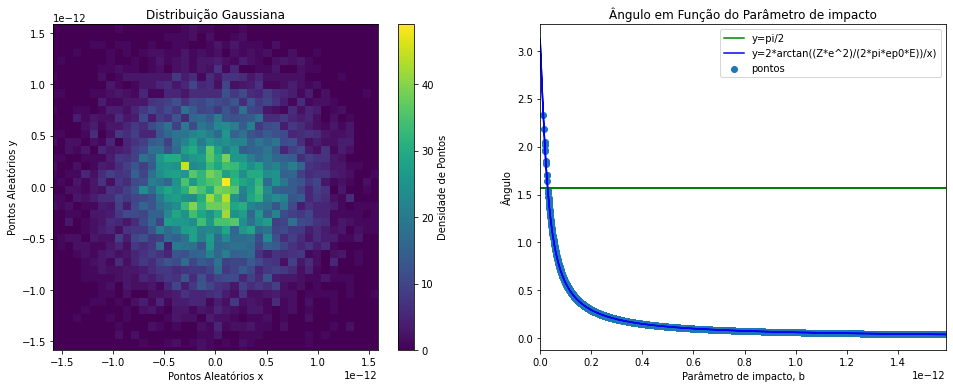

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Heatmap da Distribuição Gaussiana de x e y
ax1.set_title('Distribuição Gaussiana')
h = ax1.hist2d(bx,by,bins=50)
plt.colorbar(h[3],ax=ax1,label='Densidade de Pontos')
ax1.set_ylim(centro_disty-3*desvio_y,centro_disty+3*desvio_y)
ax1.set_xlim(centro_distx-3*desvio_x,centro_distx+3*desvio_x)
ax1.set_xlabel('Pontos Aleatórios x')
ax1.set_ylabel('Pontos Aleatórios y')

#Definição de vetores para plots
x1 = np.linspace(centro_distx-3*desvio_x,centro_distx+3*desvio_x,N)
y = np.linspace(centro_disty-3*desvio_y,centro_disty+3*desvio_y,N)
x = np.sqrt(x1**2 + y**2) #Vetor b
y1 = [np.pi/2 for i in x] #Reta em pi/2
y2 = 2*abs(np.arctan(((Z*e**2)/(2*np.pi*ep0*E))/x)) #Vetor Ângulo

#Gráficos do Espalhamento
ax2.set_title('Ângulo em Função do Parâmetro de impacto')
ax2.scatter(b,angle, label = 'pontos')
ax2.plot(x,y1, 'green', label = 'y=pi/2')
ax2.plot(x,y2, 'blue', label = 'y=2*arctan((Z*e^2)/(2*pi*ep0*E))/x)')
ax2.set_xlim(0,3*desvio_x)
ax2.set_xlabel('Parâmetro de impacto, b')
ax2.set_ylabel('Ângulo')
ax2.legend()
plt.show()

O resultado da experiência realizada em laboratório é que a maioria das partículas é dispersada com ângulos de baixo valor (inferior a 30 graus), o que corrobora o resultado que obtivemos: uma percentagem muito pequena das partículas é dispersada com um ângulo superior a 90 graus (inferior a 1%). Também se conclui que zero partículas atravessam o núcleo. 